### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [57]:
# Faturamento total de cada loja
faturamentos = {
    "Loja 1": loja1["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum(),
}
faturamento_df = pd.DataFrame(list(faturamentos.items()), columns=["Loja", "Faturamento"])
faturamento_df["Faturamento"] = faturamento_df["Faturamento"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
faturamento_df

,Loja,Faturamento
0,Loja 1,"R$ 1.534.509,12"
1,Loja 2,"R$ 1.488.459,06"
2,Loja 3,"R$ 1.464.025,03"
3,Loja 4,"R$ 1.384.497,58"


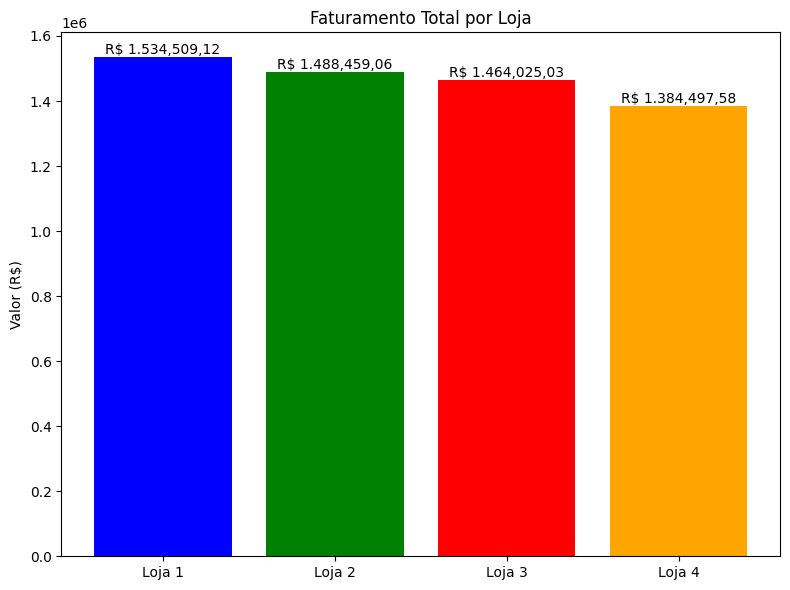

In [ ]:
# Gráfico de barras - Faturamento
faturamento_valores = [loja1['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

fig, ax = plt.subplots(figsize=(8, 6))
barras = ax.bar(labels, faturamento_valores, color=['blue', 'green', 'red', 'orange'])

# Rótulo com valor formatado em R$
for bar, valor in zip(barras, faturamento_valores):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'R$ {valor:,.2f}'.replace('.', ',').replace(',', '.', 1),
            ha='center', va='bottom', fontsize=10)

ax.set_title('Faturamento Total por Loja')
ax.set_ylabel('Valor (R$)')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [59]:
def vendas_por_categoria(df, loja_nome):
    categorias = df['Categoria do Produto'].value_counts().reset_index()
    categorias.columns = ['Categoria', 'Quantidade']
    categorias['Loja'] = loja_nome
    return categorias

vendas_cat1 = vendas_por_categoria(loja1, 'Loja 1')
vendas_cat2 = vendas_por_categoria(loja2, 'Loja 2')
vendas_cat3 = vendas_por_categoria(loja3, 'Loja 3')
vendas_cat4 = vendas_por_categoria(loja4, 'Loja 4')
vendas_cat1, vendas_cat2, vendas_cat3, vendas_cat4


(               Categoria  Quantidade    Loja
 0                 moveis         465  Loja 1
 1            eletronicos         448  Loja 1
 2             brinquedos         324  Loja 1
 3       eletrodomesticos         312  Loja 1
 4        esporte e lazer         284  Loja 1
 5  instrumentos musicais         182  Loja 1
 6                 livros         173  Loja 1
 7  utilidades domesticas         171  Loja 1,
                Categoria  Quantidade    Loja
 0                 moveis         442  Loja 2
 1            eletronicos         422  Loja 2
 2             brinquedos         313  Loja 2
 3       eletrodomesticos         305  Loja 2
 4        esporte e lazer         275  Loja 2
 5  instrumentos musicais         224  Loja 2
 6                 livros         197  Loja 2
 7  utilidades domesticas         181  Loja 2,
                Categoria  Quantidade    Loja
 0                 moveis         499  Loja 3
 1            eletronicos         451  Loja 3
 2             brinquedos       

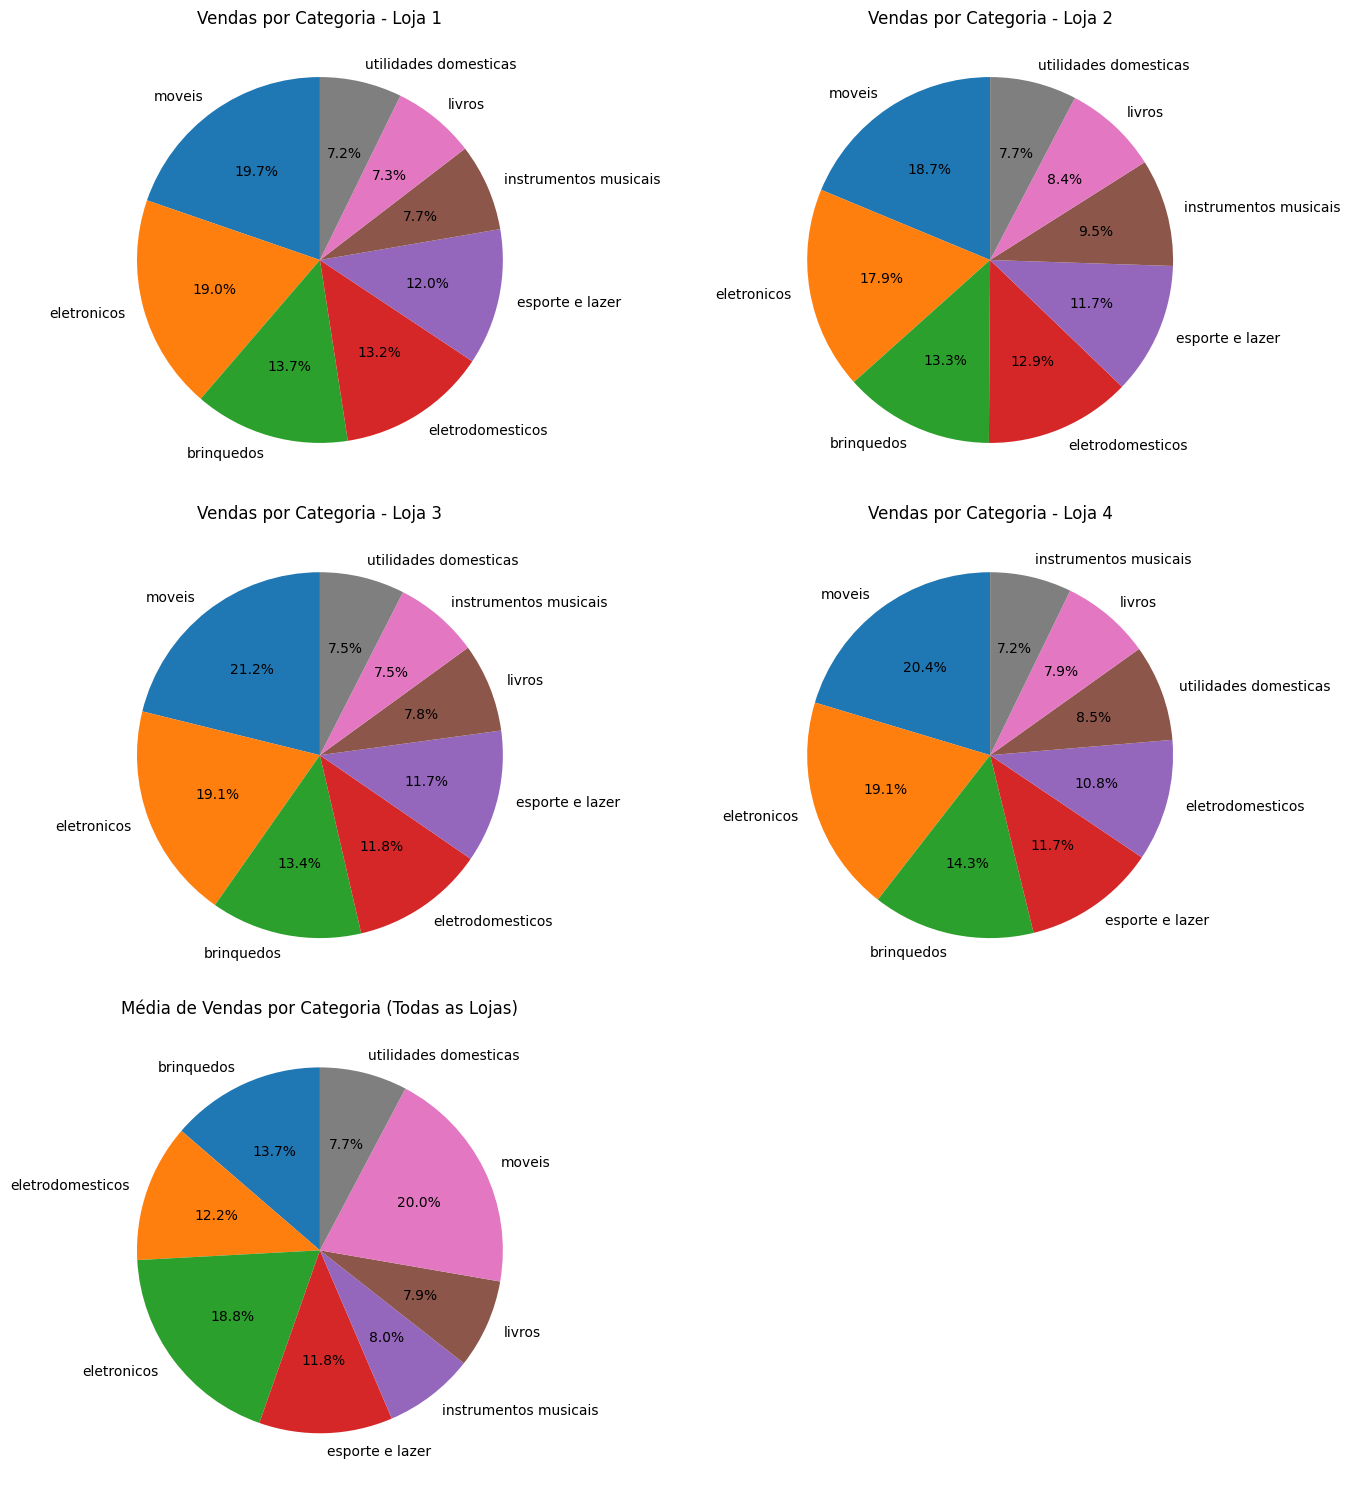

In [ ]:
#5 gráficos de pizza: 4 por loja + 1 média geral
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Dados individuais
lojas_categorias = [vendas_cat1, vendas_cat2, vendas_cat3, vendas_cat4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for ax, dados, titulo in zip(axs.flatten()[:4], lojas_categorias, titulos):
    ax.pie(dados['Quantidade'], labels=dados['Categoria'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Vendas por Categoria - {titulo}')

# Calcular soma de todas as quantidades por categoria
todas_categorias = pd.concat(lojas_categorias)
soma_categorias = todas_categorias.groupby('Categoria')['Quantidade'].sum()
media_categorias = soma_categorias / len(lojas_categorias)  # Divide pelo número de lojas

# Adicionar gráfico de pizza com média
ax_media = axs[2, 0]
ax_media.pie(media_categorias, labels=media_categorias.index, autopct='%1.1f%%', startangle=90)
ax_media.set_title('Média de Vendas por Categoria (Todas as Lojas)')

axs[2, 1].axis('off')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# 3. Média de Avaliação das Lojas

avaliacoes = {
    'Loja 1': round(loja1['Avaliação da compra'].mean(), 2),
    'Loja 2': round(loja2['Avaliação da compra'].mean(), 2),
    'Loja 3': round(loja3['Avaliação da compra'].mean(), 2),
    'Loja 4': round(loja4['Avaliação da compra'].mean(), 2)
}
avaliacoes_df = pd.DataFrame(list(avaliacoes.items()), columns=['Loja', 'Média de Avaliação'])
avaliacoes_df

,Loja,Média de Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


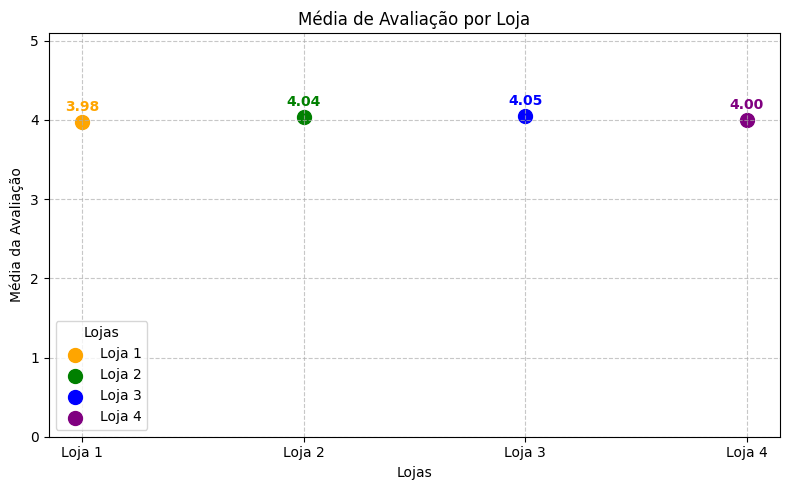

In [ ]:
# Gráfico das avaliações

cores = ['orange', 'green', 'blue', 'purple']
plt.figure(figsize=(8, 5))

for i, row in avaliacoes_df.iterrows():
    plt.scatter(row['Loja'], row['Média de Avaliação'], color=cores[i], s=100, label=row['Loja'])
    plt.text(row['Loja'], row['Média de Avaliação'] + 0.1,
             f"{row['Média de Avaliação']:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color=cores[i])

plt.ylim(0, 5.1)
plt.title('Média de Avaliação por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média da Avaliação')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Lojas')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# 4. Produtos Mais e Menos Vendidos

def mais_menos_vendidos(df, loja_nome):
    produto_vendas = df['Produto'].value_counts().reset_index()
    produto_vendas.columns = ['Produto', 'Quantidade']
    mais_vendido = produto_vendas.iloc[0]
    menos_vendido = produto_vendas.iloc[-1]
    return loja_nome, mais_vendido['Produto'], mais_vendido['Quantidade'], menos_vendido['Produto'], menos_vendido['Quantidade']

dados_vendas = [
    mais_menos_vendidos(loja1, 'Loja 1'),
    mais_menos_vendidos(loja2, 'Loja 2'),
    mais_menos_vendidos(loja3, 'Loja 3'),
    mais_menos_vendidos(loja4, 'Loja 4')
]

vendas_df = pd.DataFrame(dados_vendas, columns=['Loja', 'Mais Vendido', 'Qtd Mais Vendido', 'Menos Vendido', 'Qtd Menos Vendido'])
vendas_df

,Loja,Mais Vendido,Qtd Mais Vendido,Menos Vendido,Qtd Menos Vendido
0,Loja 1,Micro-ondas,60,Celular ABXY,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


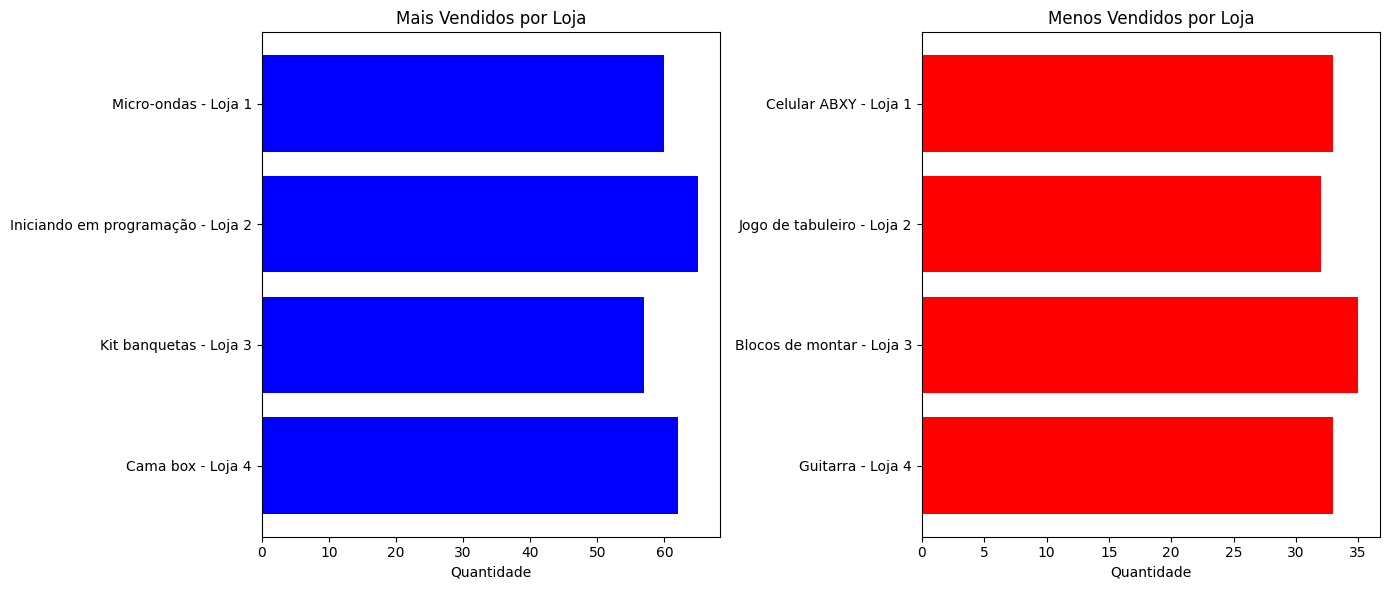

In [ ]:
# Gráfico produtos mais e menos vendidos

def produtos_extremos(df, loja_nome):
    contagem = df['Produto'].value_counts().reset_index()
    contagem.columns = ['Produto', 'Quantidade']
    return contagem.head(1), contagem.tail(1)

# Coletar os produtos mais e menos vendidos para cada loja
produtos_extremos_dados = {
    'Loja 1': produtos_extremos(loja1, 'Loja 1'),
    'Loja 2': produtos_extremos(loja2, 'Loja 2'),
    'Loja 3': produtos_extremos(loja3, 'Loja 3'),
    'Loja 4': produtos_extremos(loja4, 'Loja 4'),
}

# Organizar os dados para plotagem
mais_vendidos = pd.concat([v[0].assign(Loja=k) for k, v in produtos_extremos_dados.items()])
menos_vendidos = pd.concat([v[1].assign(Loja=k) for k, v in produtos_extremos_dados.items()])

# Criar gráfico de barras horizontais
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Mais vendidos
axs[0].barh(mais_vendidos['Produto'] + " - " + mais_vendidos['Loja'], mais_vendidos['Quantidade'], color='blue')
axs[0].set_title('Mais Vendidos por Loja')
axs[0].set_xlabel('Quantidade')
axs[0].invert_yaxis()

# Menos vendidos
axs[1].barh(menos_vendidos['Produto'] + " - " + menos_vendidos['Loja'], menos_vendidos['Quantidade'], color='red')
axs[1].set_title('Menos Vendidos por Loja')
axs[1].set_xlabel('Quantidade')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [65]:
frete_medio = {
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

frete_medio_df = pd.DataFrame(list(frete_medio.items()), columns=['Loja', 'Frete Médio'])

# Formatando os valores em reais (R$)
frete_medio_df['Frete Médio'] = frete_medio_df['Frete Médio'].apply(lambda x: f'R$ {x:,.2f}'.replace('.', ',').replace(',', '.', 1))

frete_medio_df


,Loja,Frete Médio
0,Loja 1,R$ 34.69
1,Loja 2,R$ 33.62
2,Loja 3,R$ 33.07
3,Loja 4,R$ 31.28


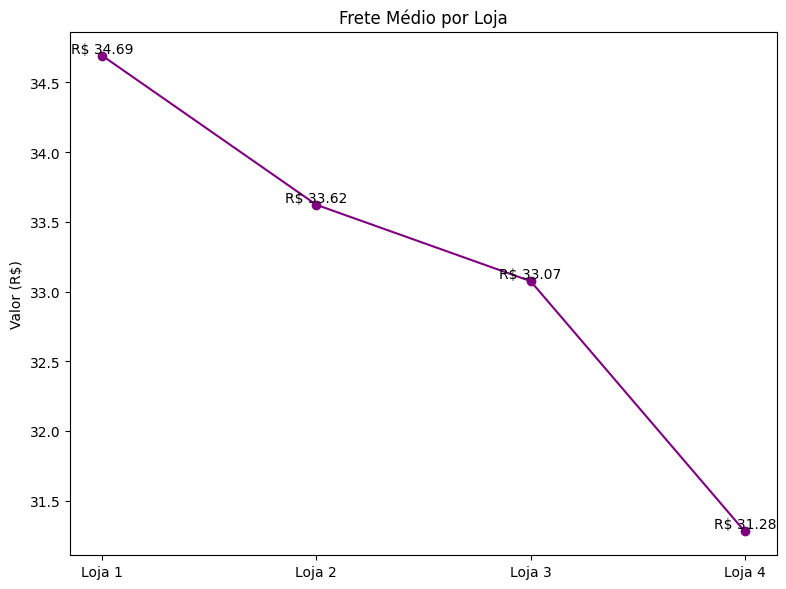

In [66]:
frete_medio_valores = [loja1['Frete'].mean(), loja2['Frete'].mean(), loja3['Frete'].mean(), loja4['Frete'].mean()]
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labels, frete_medio_valores, marker='o', linestyle='-', color='purple')

# Adiciona rótulo com valor formatado em R$
for x, y in zip(labels, frete_medio_valores):
    ax.text(x, y, f'R$ {y:,.2f}'.replace('.', ',').replace(',', '.', 1), ha='center', va='bottom')

ax.set_title('Frete Médio por Loja')
ax.set_ylabel('Valor (R$)')
plt.tight_layout()
plt.show()
